# Learning and Decision Making

## Laboratory 3: Partially observable Markov decision problems

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the POMDP problem from the homework and represented in the transition diagram below.

<img src="pomdp.png" width="400px">

Recall that:

* All transitions occur with probability 1 except those from state $A$, where the probabilities are indicated under the edge label.

* At each step, the agent makes an observation corresponding to the letter in the state designation. Such observation occurs with probability 1.

Consider throughout that $\gamma=0.9$.

---

#### Activity 1.        

Implement your POMDP in Python. In particular,

* Create a list with all the states;
* Create a list with all the actions;
* Create a list with all the observations
* For each action, define a `numpy` array with the corresponding transition probabilities;
* For each action, define a `numpy` array with the corresponding observation probabilities;
* Define a `numpy` array with the cost describing the problem.

The order for the states and actions used in the transition probability and cost matrices should match that in the lists of states and actions. 

**Note**: Don't forget to import `numpy`.

---

In [2]:
import numpy as np

states = ["A", "B1", "B2", "C", "D", "E", "F"]
actions = ["a", "b", "c"]
observations = ["A", "B", "C", "D", "E", "F"]

P_a = np.array([
    [0, .5, .5, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0]
])

P_b = np.array([
    [0, .5, .5, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0]
])

P_c = np.array([
    [0, .5, .5, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0]
])

P = [P_a, P_b, P_c]

O_a = O_b = O_c = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
])

O = [O_a, O_b, O_c]

c = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
    [0, 0, 0]
])

gamma = .9

### 2. Sampling

You are now going to sample random trajectories of your POMDP and observe the impact it has on the corresponding belief.

---

#### Activity 2.

Generate a random POMDP trajectory using a uniformly random policy. In particular, from a random initial state $x_0$ generate:

1. A sequence of 10,000 states by selecting the actions uniformly at random;
2. The corresponding sequence of 10,000 actions;
3. The corresponding sequence of 10,000 observations.

---

In [4]:
x_s = []
a_s = [None]
o_s = [None]

x_s.append(states.index(np.random.choice(states)))

i = 0
while i < 10_000:
    
    x = x_s[i]
    
    a = actions.index(np.random.choice(actions))
    a_s.append(a)
    
    next_x = states.index(np.random.choice(states, 1, p = P[a][x]))
    x_s.append(next_x)
    
    o = observations.index(np.random.choice(observations, 1, p = O[a][next_x]))
    o_s.append(o)
    
    i += 1

---

#### Activity 3.

For the POMDP trajectory generated in Activity 2, compute the corresponding sequence of beliefs, assuming that the agent does not know its initial state. Report the resulting beliefs, ignoring duplicate beliefs or beliefs whose distance is smaller than $10^{-3}$.

**Note 1:** You may want to define a function `belief_update` that receives a belief, an action and an observation and returns the updated belief.

**Note 2:** To compute the distance between vectors, you may find useful `numpy`'s function `linalg.norm`.


---

In [5]:
def belief_update(b, action, observation):
    
    b = np.dot(np.dot(b,  P[action]), np.diag(O[action][:,observation]))
    
    return b / np.sum(b)

beliefs = []

b = np.ones(len(states))
b = b / np.sum(b)

for i in range(1, len(x_s)):
    
    b = belief_update(b, a_s[i], o_s[i])
    
    new = True
    for other_b in beliefs:
        if abs(np.linalg.norm(b - other_b)) < 10e-3:
            new = False
            break
    
    if new:
        beliefs.append(b)
        
print(np.vstack(list(beliefs)))

[[1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0. ]]


### 3. Solution methods

In this section you are going to compare different non-exact solution methods.

---

#### Activity 4

Compute the solution for the underlying MDP and report the corresponding optimal policy and optimal cost-to-go. 

** Note:** You may reuse code from previous labs.

---

In [6]:
eps = 10e-8

pi = np.ones((len(states), len(actions)))
J = None
Q = None

quit = False

while not quit:
    cpi = np.zeros((len(states)))
    Ppi = np.zeros((len(states), len(states)))
    for a, action in enumerate(actions):
        cpi += np.diag(pi[:, a]).dot(c[:, a])
        Ppi += np.diag(pi[:, a]).dot(P[a])
    
    J = np.linalg.inv(np.identity(len(states)) - gamma * Ppi).dot(cpi)
    
    Q = np.zeros((len(actions), len(states)))
    for a, action in enumerate(actions):
        Q[a] = c[:, a] + gamma * P[a].dot(J)
    
    
    pinew = np.zeros((len(states), len(actions)))
    for a, action in enumerate(actions):
        pinew[:, a] = np.isclose(Q[a], np.min(Q, axis=0), atol=eps, rtol=eps).astype(int)
    
    pinew = pinew / np.sum(pinew, axis=1, keepdims=True)
    
    quit = np.isclose(pi, pinew, atol=eps, rtol=eps).all()
    pi = pinew

print("π:\n", pi)
print("J:\n", J)

π:
 [[0.33333333 0.33333333 0.33333333]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
J:
 [7.01107011 6.67896679 6.67896679 7.01107011 7.01107011 7.3099631
 6.3099631 ]


---

#### Activity 5

For each of the beliefs computed in Activity 3, compute the action prescribed by:

* The MLS heuristic;
* The AV heuristic;
* The Q-MDP heuristic.

---

In [7]:
# MLS
print("MLS")
pi_MLS = []
for b, belief in enumerate(beliefs):
    pi_MLS.append(pi[np.argmax(belief)])
    print(belief, '=>', pi_MLS[b])

print("AV")
pi_AV = []
for b, belief in enumerate(beliefs):
    max_a = None
    max_val = 0
    for a, action in enumerate(actions):
        value = 0
        for x in range(len(states)):
            value += belief[x] * (1 if a == np.argmax(pi[x]) else 0)
        
        if value > max_val:
            max_a = a
            max_val = value
    
    pi_AV.append(np.eye(1,len(actions),max_a)[0])
    print(belief, '=>', pi_AV[b])
    
print("Q-MDP")
pi_Q_MDP = []
for b, belief in enumerate(beliefs):
    
    min_a = None
    min_value = float("inf")
    for a, action in enumerate(actions):
        value = np.sum(belief.dot(Q[a]))
        
        if value < min_value:
            min_a = a
            min_value = value
        
    pi_Q_MDP.append(np.eye(1,len(actions),min_a)[0])
    print(belief, '=>', pi_Q_MDP[b])


MLS
[1. 0. 0. 0. 0. 0. 0.] => [0.33333333 0.33333333 0.33333333]
[0.  0.5 0.5 0.  0.  0.  0. ] => [0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1.] => [0.33333333 0.33333333 0.33333333]
[0. 0. 0. 0. 0. 1. 0.] => [0.33333333 0.33333333 0.33333333]
[0. 0. 0. 1. 0. 0. 0.] => [0.33333333 0.33333333 0.33333333]
[0. 1. 0. 0. 0. 0. 0.] => [0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0.] => [0.33333333 0.33333333 0.33333333]
[0. 0. 1. 0. 0. 0. 0.] => [1. 0. 0.]
AV
[1. 0. 0. 0. 0. 0. 0.] => [1. 0. 0.]
[0.  0.5 0.5 0.  0.  0.  0. ] => [1. 0. 0.]
[0. 0. 0. 0. 0. 0. 1.] => [1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0.] => [1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0.] => [1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0.] => [0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0.] => [1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0.] => [1. 0. 0.]
Q-MDP
[1. 0. 0. 0. 0. 0. 0.] => [1. 0. 0.]
[0.  0.5 0.5 0.  0.  0.  0. ] => [1. 0. 0.]
[0. 0. 0. 0. 0. 0. 1.] => [1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0.] => [1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0.] => [1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0.] => [0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0.] => [1. 0.

---

#### Activity 6

Suppose that the optimal cost-to-go function for the POMDP can be represented using the $\alpha$-vectors



$$
\left\{
\begin{bmatrix}
8.39727208 \\
8.70168739 \\
7.80168739 \\
8.39727208 \\
8.39727208 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
8.70168739 \\
7.80168739 \\
8.02145332 \\
8.83145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
8.70168739 \\
7.80168739 \\
8.83145332 \\
8.02145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.39727208 \\
7.80168739 \\
8.70168739 \\
8.39727208 \\
8.39727208 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
7.80168739 \\
8.70168739 \\
8.02145332 \\
8.83145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
7.80168739 \\
8.70168739 \\
8.83145332 \\
8.02145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.39727208 \\
8.2192667  \\
8.2192667  \\
8.39727208 \\
8.39727208 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
8.2192667  \\
8.2192667  \\
8.02145332 \\
8.83145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
8.2192667  \\
8.2192667  \\
8.83145332 \\
8.02145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},\right\}$$

where the first 3 vectors correspond to action $a$, the middle three vectors correspond to action $b$ and the last 3 vectors correspond to action $c$. Using the $\alpha$-vectors above, 

* Represent the the optimal cost-to-go function for all beliefs of the form $\mathbf{b}=[0, \epsilon, 1-\epsilon, 0, 0, 0, 0]$, with $\epsilon\in[0,1]$. 
* Compare the optimal policy with the MDP heuristics from Activity 5 in the beliefs computed in Activity 3.

** Note: ** Don't forget to import `matplotlib`, and use the magic `%matplotlib notebook`.

---

<IPython.core.display.Javascript object>


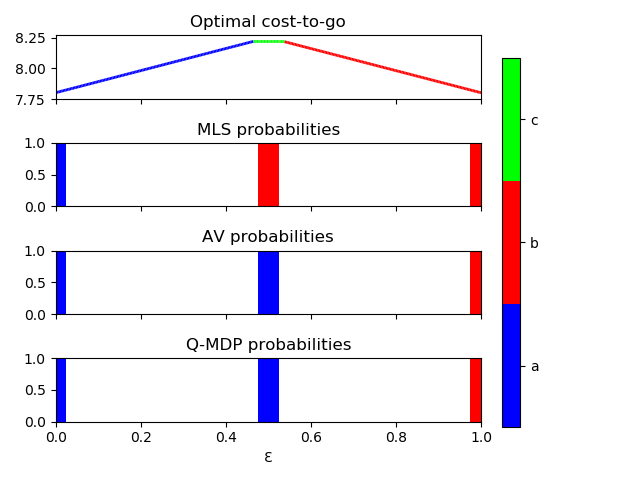

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import warnings
warnings.filterwarnings("ignore")

alphas = [[8.39727208,8.70168739,7.80168739,8.39727208,8.39727208,8.55748144,7.55748144],
          [ 8.42645332,8.70168739,7.80168739,8.02145332,8.83145332,8.55748144,7.55748144],
          [ 8.42645332,8.70168739,7.80168739,8.83145332,8.02145332,8.55748144,7.55748144],
          [ 8.39727208,7.80168739,8.70168739,8.39727208,8.39727208,8.55748144,7.55748144],
          [ 8.42645332,7.80168739,8.70168739,8.02145332,8.83145332,8.55748144,7.55748144],
          [ 8.42645332,7.80168739,8.70168739,8.83145332,8.02145332,8.55748144,7.55748144],
          [ 8.39727208,8.2192667 ,8.2192667 ,8.39727208,8.39727208,8.55748144,7.55748144],
          [ 8.42645332,8.2192667 ,8.2192667 ,8.02145332,8.83145332,8.55748144,7.55748144],
          [ 8.42645332,8.2192667 ,8.2192667 ,8.83145332,8.02145332,8.55748144,7.55748144]]

alpha_actions = [0, 0, 0, 1, 1, 1, 2, 2, 2]

X = []
A = []
Y = []
for x in np.linspace(0, 1, 300):
    b = np.array([0, x, 1-x, 0, 0, 0, 0])
    
    X.append(x)
    
    min_J = float("inf")
    action = None
    for a, alpha in enumerate(alphas):
        
        J = b.dot(alpha)
        
        if J < min_J:
            min_J = J
            action = alpha_actions[a]
        
    Y.append(min_J)
    A.append(action)

X_1 = []
Y_MLS = []
Y_AV = []
Y_Q_MDP = []
for b, belief in enumerate(beliefs):
    if belief[0] == 0 and belief[2] == 1 - belief[1] and belief[3] == 0 and belief[4] == 0 and belief[5] == 0 and belief[6] == 0:
        X_1.append(belief[1])
        Y_MLS.append(pi_MLS[b])
        Y_AV.append(pi_AV[b])
        Y_Q_MDP.append(pi_Q_MDP[b])
        
Y_MLS = np.array(Y_MLS)
Y_AV = np.array(Y_AV)
Y_Q_MDP = np.array(Y_Q_MDP)
    
# convert points to segments
points = np.array([X, Y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fig, axs = plt.subplots(4, 1, sharex=True)

#Use a boundary norm instead
lc = LineCollection(segments, cmap=plt.cm.get_cmap('brg', 3))
lc.set_array(np.array(A))
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
formatter = plt.FuncFormatter(lambda val, loc: actions[val])
fig.colorbar(line, ticks=[0,1,2], format=formatter, boundaries=[-.5, .5, 1.5, 2.5], values=[0,1,2], ax=axs)

axs[0].set_xlim(min(X), max(X))
axs[0].set_ylim(min(Y) - 0.05, max(Y) + 0.05)
axs[0].set_title("Optimal cost-to-go")

axs[1].bar(X_1, Y_MLS[:,0], width=0.05, color='b')
axs[1].bar(X_1, Y_MLS[:,1], width=0.05, bottom=Y_MLS[:,0], color='r')
axs[1].bar(X_1, Y_MLS[:,2], width=0.05, bottom=Y_MLS[:,0]+Y_MLS[:,1], color='g')
axs[1].set_title("MLS probabilities")

axs[2].bar(X_1, Y_AV[:,0], width=0.05, color='b')
axs[2].bar(X_1, Y_AV[:,1], width=0.05, bottom=Y_AV[:,0], color='r')
axs[2].bar(X_1, Y_AV[:,2], width=0.05, bottom=Y_AV[:,0]+Y_AV[:,1], color='g')
axs[2].set_title("AV probabilities")

axs[3].bar(X_1, Y_Q_MDP[:,0], width=0.05, color='b')
axs[3].bar(X_1, Y_Q_MDP[:,1], width=0.05, bottom=Y_Q_MDP[:,0], color='r')
axs[3].bar(X_1, Y_Q_MDP[:,2], width=0.05, bottom=Y_Q_MDP[:,0]+Y_Q_MDP[:,1], color='g')
axs[3].set_title("Q-MDP probabilities")

axs[3].set_xlabel("Ɛ")

plt.tight_layout(rect=(0,0,.775,1))
plt.show()

The three MDP heuristics make the optimal choice when the agent has a strong belief in whether he is in state B_1 or B_2. However, when the agent does not know, these heuristics make the agent take either action a or b, neither of which is optimal; in this situation the optimal choice would be to take action c, check whether we end up in C or D, and when we come back to B_1/B_2 we can make a more informed choice, as we would be certain of whether we are in B_1 or B_2.